<a href="https://colab.research.google.com/github/ed-chin-git/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/U2S2D5_Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [214]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [215]:
df.isna().sum()

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

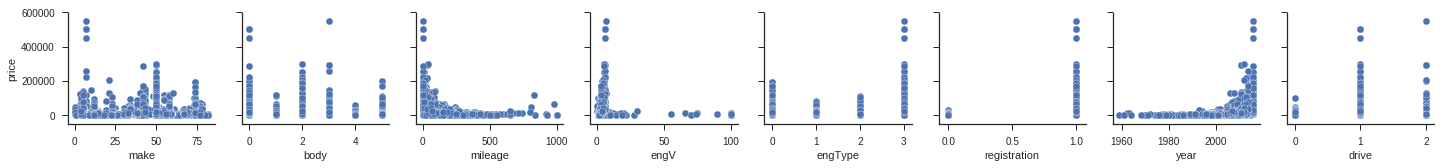

In [216]:
sns.set(style='ticks', color_codes=True)
depend_vars = df.columns.drop(['price'])
sns.pairplot(data=df,
                  y_vars=['price'],
                  x_vars=depend_vars);

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
y = df.loc[:,["price"]].values
X = df.loc[:, ['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive']].values


## 1.2 Split the data into test and train datasets using train_test_split

In [218]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)
print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8495, 8) 

(4247, 8)
(4248, 8)
(4247, 1)
(4248, 1)


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [219]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [220]:
beta_0 = model.intercept_
beta_i = model.coef_[0]
print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

Slope Coefficients:  [  -35.22479484 -1672.11973555   -37.12848399   269.61582544
 -1284.74375962  4649.46225339  1098.2829573   7886.89079148]

Intercept Value:  [-2184591.01156087]


## 1.5 Use the test data to make predictions

In [0]:
y_test_predict = model.predict(X_test)


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [222]:
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(MSE))
R2 = r2_score(Y_test, y_test_predict)

print("MSE is {}".format(MSE))
print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

MSE is 504905647.2241809
RMSE is 22470.105634468673
R^2 is 0.2694482951962186


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

***the coefficient of the 'year' feature describes the relationship between the target(price) and the 'year'.  Basically it represents the increase in price(1098.28) for every  year of variation. ***

## 1.8 How should we interpret the Root-Mean-Square Error?

***The root-mean-square deviation or root-mean-square error is a measure of the differences between values predicted by a model and the values observed.  All the values are squared then averaged***

## 1.9 How should we interpret the $R^2$?

*** The R2 value represents the percentage of the price(dependant variable) that is explained by the x variables (independent variables)   According to the model prediction  above 16.86% of the car's price is explained by the year and mileage***

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

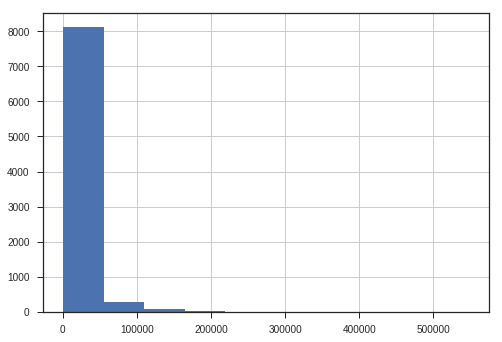

In [223]:
df['ln_price'] = np.log(df['price'])
df.price.hist()

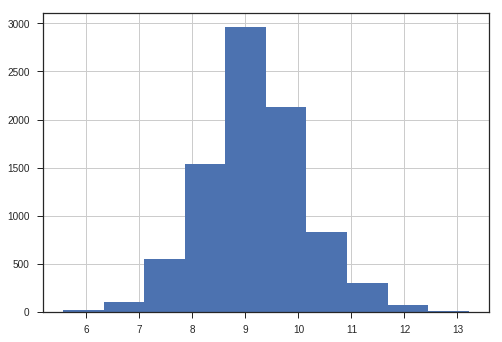

In [224]:
df.ln_price.hist()

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

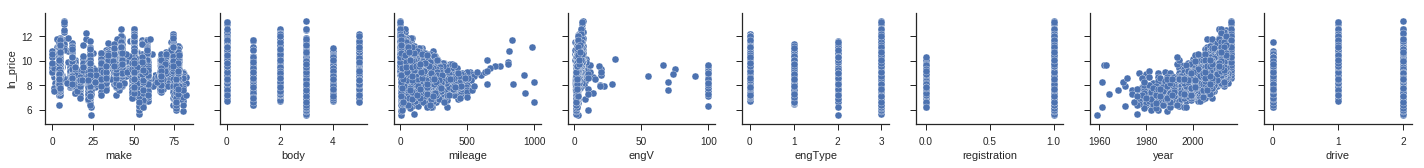

In [225]:
sns.set(style='ticks', color_codes=True)
depend_vars = df.columns.drop(['price','ln_price'])
sns.pairplot(data=df,
                  y_vars=['ln_price'],
                  x_vars=depend_vars);

## 2.3 If appropriate, create any polynomial features. 

In [226]:
df['mileage_squared'] = df['mileage']**2
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price,mileage_squared
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4624
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,29929
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,18225
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,26244
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,6889


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

### Run a Baseline Bivariate First

In [227]:
# BASELINE Bivariate Regression -> price / mileage
y = df.loc[:, ['ln_price']].values
X = df.loc[:, ['mileage']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)
beta_0 = model.intercept_
beta_i = model.coef_[0]
print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('\nRMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))


Slope Coefficients:  [-0.00391102]

Intercept Value:  [9.73053399]

RMSE is 0.8925824456599752
R^2 is 0.1537534708542273


### polynomial Multiple Regression -> Log Price 

In [228]:
# polynomial Multiple Regression -> price / mileage + mileage_squared
y = df.loc[:, ['ln_price']].values

X = df.loc[:, ['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'mileage_squared']].values

# Split into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)
beta_0 = model.intercept_
beta_i = model.coef_[0]
print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('\nRMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

Slope Coefficients:  [-1.45356794e-03 -8.30691309e-02 -6.68085626e-04  9.55310491e-03
 -6.17528897e-02  7.20918168e-01  9.34109104e-02  3.98220483e-01
  1.33951015e-06]

Intercept Value:  [-178.76860528]

RMSE is 0.5670259132955293
R^2 is 0.6584879506121837


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

***by using the log of the price,  the coefficient now represents the percentage of increase in price(1098.28) for every  year of variation. ***

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

***It seeks to find the minimum value of a cost function using iteration. You start by defining the initial parameters values and from there on Gradient Descent iteratively adjusts the values, using calculus, so that they minimize the given cost-function.***

## 3.2 What is the "Learning Rate" and what is its function?

***Parameter in the Gradient Descent algorithm that determines how fast or slow it will move towards the optimal weights. If the learning-rate is very large it will skip the optimal solution. If it is too small it will need too many iterations to converge to the best values. So using a good learning rate is crucial.***

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [229]:
X = df.drop(columns=['price','ln_price'])
y = df['ln_price']



# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1507.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:58:22   Log-Likelihood:                -7145.2
No. Observations:                8495   AIC:                         1.431e+04
Df Residuals:                    8485   BIC:                         1.438e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -179.8995      3.457    -

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

**Calculate the VIF**

In [230]:

# Calculate the VIF
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#Determine outliers
outlyrs = [i > 10 for i in vifs]

# Plot with cute srtring formatting
for col, vif, outly in zip(X.columns, vifs, outlyrs):
    print(f'{col:15} {vif:<7.2f} {"<<****" if outly else ""}')

const           125568.63 <<****
make            1.06    
body            1.17    
mileage         5.41    
engV            1.01    
engType         1.15    
registration    1.10    
year            1.48    
drive           1.13    
mileage_squared 4.38    


***Except for const,  No VIF values greater than 10.  There doesn't seem to be a multicollinearity problem.  vif for const is huge!  must investigate....***






**Let's try again without the CONST**

In [231]:
no_const = X.drop('const', axis=1)
no_const.corr()

,make,body,mileage,engV,engType,registration,year,drive,mileage_squared
make,1.000000,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.013833,-0.196444,-0.031106
body,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.154554,-0.162235,0.195170
mileage,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.229354,-0.503135,0.067962,0.872954
engV,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.015274,-0.041076,0.084756,0.033698
engType,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.040471,-0.044859,-0.169311
registration,0.104557,-0.082643,-0.229354,-0.015274,0.152988,1.000000,0.185104,-0.055793,-0.163092
year,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,1.000000,-0.169709,-0.389608
drive,-0.196444,-0.162235,0.067962,0.084756,-0.044859,-0.055793,-0.169709,1.000000,0.083042
mileage_squared,-0.031106,0.195170,0.872954,0.033698,-0.169311,-0.163092,-0.389608,0.083042,1.000000


In [232]:
# Calculate the VIF
vifs = [variance_inflation_factor(no_const.values, i) for i in range(no_const.shape[1])]
#Determine outliers
outlyrs = [i > 10 for i in vifs]

# Plot with cute srtring formatting
for col, vif, outly in zip(X.columns, vifs, outlyrs):
    print(f'{col:15} {vif:<7.2f} {"<<****" if outly else ""}')

const           4.83    
make            3.54    
body            14.50   <<****
mileage         1.24    
engV            2.74    
engType         18.62   <<****
registration    32.96   <<****
year            1.75    
drive           6.12    


**Worse!!!!  UGH!**